## K-Means
K means is one of the clustering technique, it is used to group data points or individuals in the experiment based on the similarity. The name k-means might bring ambguity with k-Nearest nieghbours (knn) due to $k$ factor. Unlike knn, it is unsupervised learning where labels/output are not known prior to learning of the model.
<br>
$k$ decides or defines number of clusters to be created. Choosing $k$ is a tricky technique. We often use Elbow method based on our dataset, which tells about chossing best $k$ value for the model to be trained.<br>
<img src='ElbowMethod.png' alt='Elbow Method' width='400'>
<br>
The above diagram helps in choosing the best $k$ value for our model, the $k$ value is choosen based on minimum (optimal) <u>within-cluster sum of squares</u> (WCSS). In our case $k$ value would be 5 to avoid overfitting of data.
<br>
K means seems to fail with different density of datapoints in given dataset, since it relies on distance measures. And clustering is bad option if dataset contains labeled data/features. Initiating the process of kmeans learning is critical for generating clusters out of given dataset, because conventional k means chooses random $k$ points to start with and build clusters based on these choosen random points. Every run will give different results if initial $k$ values are choosen at random.<br>
So we use <b>k-means++</b> method for initialisation of $k$ points to begin training our model. It spreads $k$ initial clusters centers/centriods away from each other for better clustering of datapoints. A initial random value will be choosen from datapoints and accordingly initial $k$ points would be choosen based on the probabilities in accordance with random value choosen.<br>
k means also faces curse of dimensionality, it is recommended to do dimensionality reduction.
<br>
We will be working on dataset of person's spending in the mall and apply k means to segment the users accordingly into differnt clusters.

In [1]:
# K-Means Clustering

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values

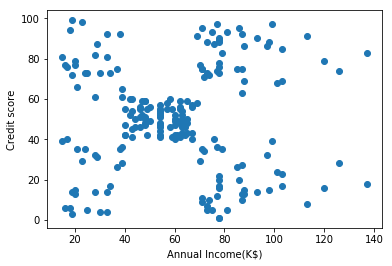

In [7]:
plt.scatter(X[:,0],X[0:,1])
plt.xlabel('Annual Income(K$)')
plt.ylabel('Credit score')
plt.show()

Training kmeans model with initial $k=5$ parameter from above elbow method.

In [9]:
# Fitting K-Means to the dataset
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42,n_jobs=4)
y_kmeans = kmeans.fit_predict(X)

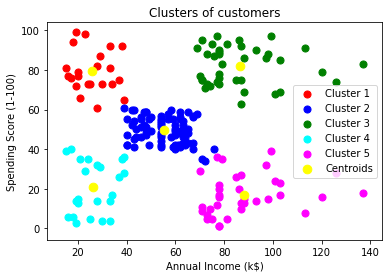

In [10]:
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 50, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 75, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

We can observe from above figure, five clusters are created accordingly with density of datapoints based on centriods of respective clusters. As we can see choosing $k$ is important factor for clustering of such kind, and it can drastically affect your results based on your type of dataset.
<br>
Some of the drawbacks are it fails on different density of cluster datapoints, and difficulty in choosing $k$ value.
The following link sums up drawbacks of k-means:https://stats.stackexchange.com/questions/133656/how-to-understand-the-drawbacks-of-k-means/133694#133694

#### References
1. http://bigdata-madesimple.com/possibly-the-simplest-way-to-explain-k-means-algorithm/
2. https://www.datascience.com/blog/k-means-clustering
3. https://en.wikipedia.org/wiki/K-means_clustering
4. https://datasciencelab.wordpress.com/2014/01/15/improved-seeding-for-clustering-with-k-means/